In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
movie_df = pd.read_csv("../data/full_movie_dataset.csv")
movie_df = movie_df.drop(columns="Unnamed: 0")
movie_df.head(2)

,year,adult,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,genres,budget,revenue,best_picture_winner
0,2015,False,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,11.8411,2015-04-22,avengers: age of ultron,7.271,23847,"[""'Action'"", "" 'Adventure'"", "" 'Science Fictio...",365000000,1405403694,False
1,2015,False,76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,10.6392,2015-05-13,mad max: fury road,7.627,23503,"[""'Action'"", "" 'Adventure'"", "" 'Science Fictio...",150000000,378858340,False


In [3]:
movie_df.corr(numeric_only=True)

,year,adult,id,popularity,vote_average,vote_count,budget,revenue,best_picture_winner
year,1.000000,NaN,0.821077,0.180953,0.098490,-0.407294,-0.013513,-0.128327,0.011683
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,0.821077,NaN,1.000000,0.100371,0.126431,-0.444835,-0.268143,-0.274536,0.009940
popularity,0.180953,NaN,0.100371,1.000000,0.208696,0.301107,0.281861,0.398017,0.059937
vote_average,0.098490,NaN,0.126431,0.208696,1.000000,0.268827,-0.029440,0.154023,0.128408
vote_count,-0.407294,NaN,-0.444835,0.301107,0.268827,1.000000,0.475738,0.691243,0.075102
budget,-0.013513,NaN,-0.268143,0.281861,-0.029440,0.475738,1.000000,0.686922,-0.044864
revenue,-0.128327,NaN,-0.274536,0.398017,0.154023,0.691243,0.686922,1.000000,0.000771
best_picture_winner,0.011683,NaN,0.009940,0.059937,0.128408,0.075102,-0.044864,0.000771,1.000000


### A quick review of the correlation shows there might be a correlation between:
* popularity & vote count
* popularity & revenue
* vote count & budget
* vote count & revenue
* budget & revenue

Also a negative correlation between:
* year & vote count

## Is there a correlation between release date and revenue / profit?

In [4]:
# ADD GROSS PROFIT COLUMN
movie_df['gross'] = movie_df['revenue'] - movie_df['budget']

# CONVERT RELEASE DATE TO A DATETIME OBJECT
movie_df['release_date'] = movie_df['release_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [5]:
# ADD A RELEASE MONTH COLUMN
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

# ADD A QUARTER COLUMN
movie_df['release_quarter'] = movie_df['release_month'].apply(
    lambda m: 1 if m in [1, 2, 3]
    else 2 if m in [4, 5, 6]
    else 3 if m in [7, 8, 9]
    else 4
)
movie_df.head(2)

,year,adult,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,genres,budget,revenue,best_picture_winner,gross,release_month,release_quarter
0,2015,False,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,11.8411,2015-04-22,avengers: age of ultron,7.271,23847,"[""'Action'"", "" 'Adventure'"", "" 'Science Fictio...",365000000,1405403694,False,1040403694,4,2
1,2015,False,76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,10.6392,2015-05-13,mad max: fury road,7.627,23503,"[""'Action'"", "" 'Adventure'"", "" 'Science Fictio...",150000000,378858340,False,228858340,5,2


In [6]:
# MAKE A COPY OF MOVIE DF AND FORMAT THE FINANCIAL COLUMNS
movie_fmt_df = movie_df.copy()
movie_fmt_df['budget'] = (movie_fmt_df['budget'] / 1000000).round(3)
movie_fmt_df['revenue'] = (movie_fmt_df['revenue'] / 1000000).round(3)
movie_fmt_df['gross'] = (movie_fmt_df['gross'] / 1000000).round(3)
movie_fmt_df.head(2)

,year,adult,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,genres,budget,revenue,best_picture_winner,gross,release_month,release_quarter
0,2015,False,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,11.8411,2015-04-22,avengers: age of ultron,7.271,23847,"[""'Action'"", "" 'Adventure'"", "" 'Science Fictio...",365.0,1405.404,False,1040.404,4,2
1,2015,False,76341,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,10.6392,2015-05-13,mad max: fury road,7.627,23503,"[""'Action'"", "" 'Adventure'"", "" 'Science Fictio...",150.0,378.858,False,228.858,5,2


In [7]:
movie_df.corr(numeric_only=True)

,year,adult,id,popularity,vote_average,vote_count,budget,revenue,best_picture_winner,gross,release_month,release_quarter
year,1.000000,NaN,0.821077,0.180953,0.098490,-0.407294,-0.013513,-0.128327,0.011683,-0.145615,-0.016999,-0.014993
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,0.821077,NaN,1.000000,0.100371,0.126431,-0.444835,-0.268143,-0.274536,0.009940,-0.248500,0.073590,0.078519
popularity,0.180953,NaN,0.100371,1.000000,0.208696,0.301107,0.281861,0.398017,0.059937,0.388428,0.043567,0.026818
vote_average,0.098490,NaN,0.126431,0.208696,1.000000,0.268827,-0.029440,0.154023,0.128408,0.186801,0.150967,0.146866
vote_count,-0.407294,NaN,-0.444835,0.301107,0.268827,1.000000,0.475738,0.691243,0.075102,0.678218,-0.011622,-0.017867
budget,-0.013513,NaN,-0.268143,0.281861,-0.029440,0.475738,1.000000,0.686922,-0.044864,0.535088,0.008042,-0.006945
revenue,-0.128327,NaN,-0.274536,0.398017,0.154023,0.691243,0.686922,1.000000,0.000771,0.981504,-0.001353,-0.012707
best_picture_winner,0.011683,NaN,0.009940,0.059937,0.128408,0.075102,-0.044864,0.000771,1.000000,0.012714,0.060828,0.066007
gross,-0.145615,NaN,-0.248500,0.388428,0.186801,0.678218,0.535088,0.981504,0.012714,1.000000,-0.003691,-0.012941


### Does not appear to be a linear correlation

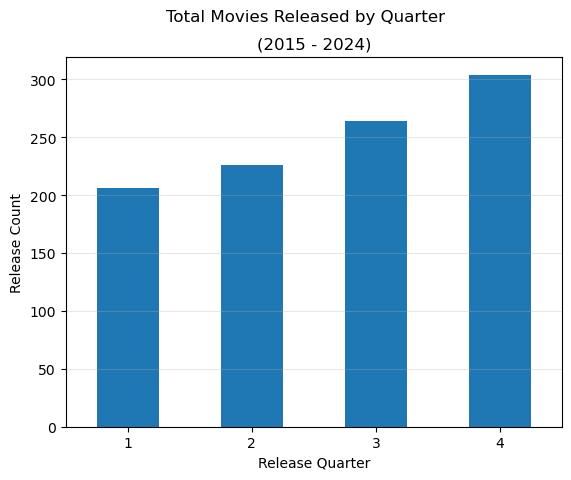

In [8]:
# PLOT AVERAGE MOVIE RELEASES BY QUARTER
quarter_release_plot = movie_fmt_df.groupby("release_quarter")['release_quarter'].count().plot(kind="bar")
plt.suptitle("Total Movies Released by Quarter")
plt.title("(2015 - 2024)")
plt.ylabel(ylabel="Release Count")
plt.xlabel(xlabel="Release Quarter")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.savefig('../images/total_movies_released_by_quarter.png', dpi = 150);

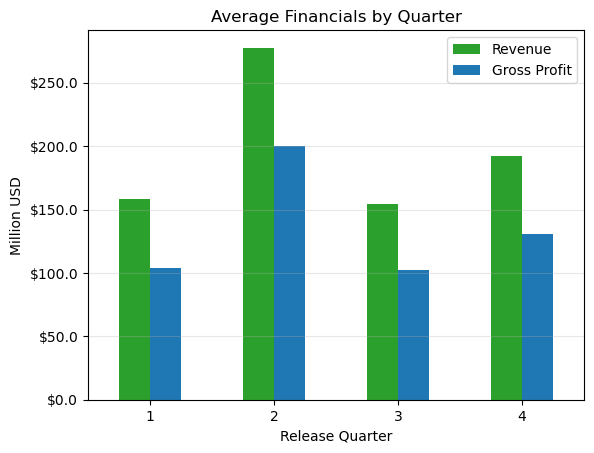

In [9]:
# PLOT AVERAGE REVENUE AND GROSS PROFIT BY QUARTER
quarter_mean_plot = movie_fmt_df.groupby("release_quarter").mean(numeric_only=True).plot(kind="bar", y=['revenue', 'gross'], color=['tab:green', 'tab:blue'])
plt.title("Average Financials by Quarter")
plt.ylabel(ylabel="Million USD")
quarter_mean_plot.yaxis.set_major_formatter('${x}')
plt.xlabel(xlabel="Release Quarter")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Revenue', 'Gross Profit'], loc=0)
plt.savefig('../images/average_financials_by_quarter.png', dpi = 150);

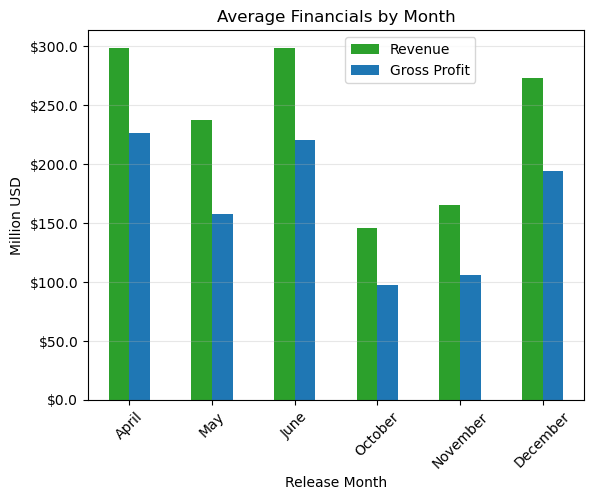

In [10]:
# PLOT AVERAGE REVENUE AND GROSS PROFIT BY QUARTER BROKEN DOWN BY MONTH
q2_mean_df = movie_fmt_df.groupby("release_month").mean(numeric_only=True).iloc[3:6]
q4_mean_df = movie_fmt_df.groupby("release_month").mean(numeric_only=True).iloc[9:]
q2_q4_mean_df = pd.concat([q2_mean_df, q4_mean_df])
q2_q4_mean_plot = q2_q4_mean_df.plot(kind="bar", y=['revenue', 'gross'], color=['tab:green', 'tab:blue'])
plt.title("Average Financials by Month")
plt.ylabel(ylabel="Million USD")
q2_q4_mean_plot.yaxis.set_major_formatter('${x}')
plt.xlabel(xlabel="Release Month")
plt.xticks(ticks=range(6), labels=['April', 'May', 'June', 'October', 'November', 'December'], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(['Revenue', 'Gross Profit'], loc=9, bbox_to_anchor=(0.65, 1.0))
plt.savefig('../images/average_financials_by_month.png', dpi = 150);